In [1]:
import sys

%matplotlib inline
sys.path.append('../')
from GetControlGenes import FeatureFinder, PullQCGenes

# Optional cell to pull and unzip gbff file
### valid genbank file format file required to be fed into FeatureFinder object
### which can be manually downloaded as well.

In [2]:
filename = 'Strep_ag_GCA_900155855.1_BM110_features.gbff'

In [3]:
from sh import wget, gunzip

# download genbank file and rename
#wget('https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/155/855/GCA_900155855.1_BM110/GCA_900155855.1_BM110_genomic.gbff.gz', 
#     '-O', filename + '.gz')

# unzip the genbank file
#gunzip(filename + '.gz')

In [4]:
# create feature finder
ff = FeatureFinder()

# Simple dataframe for features within gbff
rna_df = ff.get_features(filename)
rna_df = rna_df.drop_duplicates('Gene')

rna_df = rna_df[rna_df.aa_length > 53]
rna_df.head()


,Gene,Locus,Location,Start,End,Orientation,Sequence,Feature,length,aa_length
1052,Carboxymuconolactone_decarboxylase,BQ8897_BM110_00561,[495471:495633](-),495471,495633,reverse,ATGAAAGAAAAACAAACAGCCGGACGTCGTCAATTAGAAGAATTTG...,CDS,162,54.0
522,Late_competence_protein_ComGG_,BQ8897_BM110_00284,[236955:237123](+),236955,237123,forward,ATGATTTTAAAGAAGAAACTTAAAGCTGGCATCCTTTTGCAAGCTA...,CDS,168,56.0
254,"prophage_Sa05,_CopG_family_transcriptional_reg...",BQ8897_BM110_00148,[110809:110980](+),110809,110980,forward,TTGAGTCCAACTTTAGGAAGACCCAAAAGCGAAAATCCCAAAAGTA...,CDS,171,57.0
2285,"oxidoreductase,_short_chain_dehydrogenase_/red...",BQ8897_BM110_01179,[1129602:1129773](-),1129602,1129773,reverse,ATGATATCACGTAAAGTTGCGCTTGTGACGGGGGCATCTGCTGGTT...,CDS,171,57.0
4358,LysM_domain_protein,BQ8897_BM110_02219,[2140889:2141060](-),2140889,2141060,reverse,ATGTCAATAACCTCGGTTAAAAAATCAAAACCATTTAAATTAGGAG...,CDS,171,57.0


Found 2078 entries associated with Carboxymuconolactone_decarboxylase AND Streptococcus[Organism] in protein database
0 quer_lim 300 300


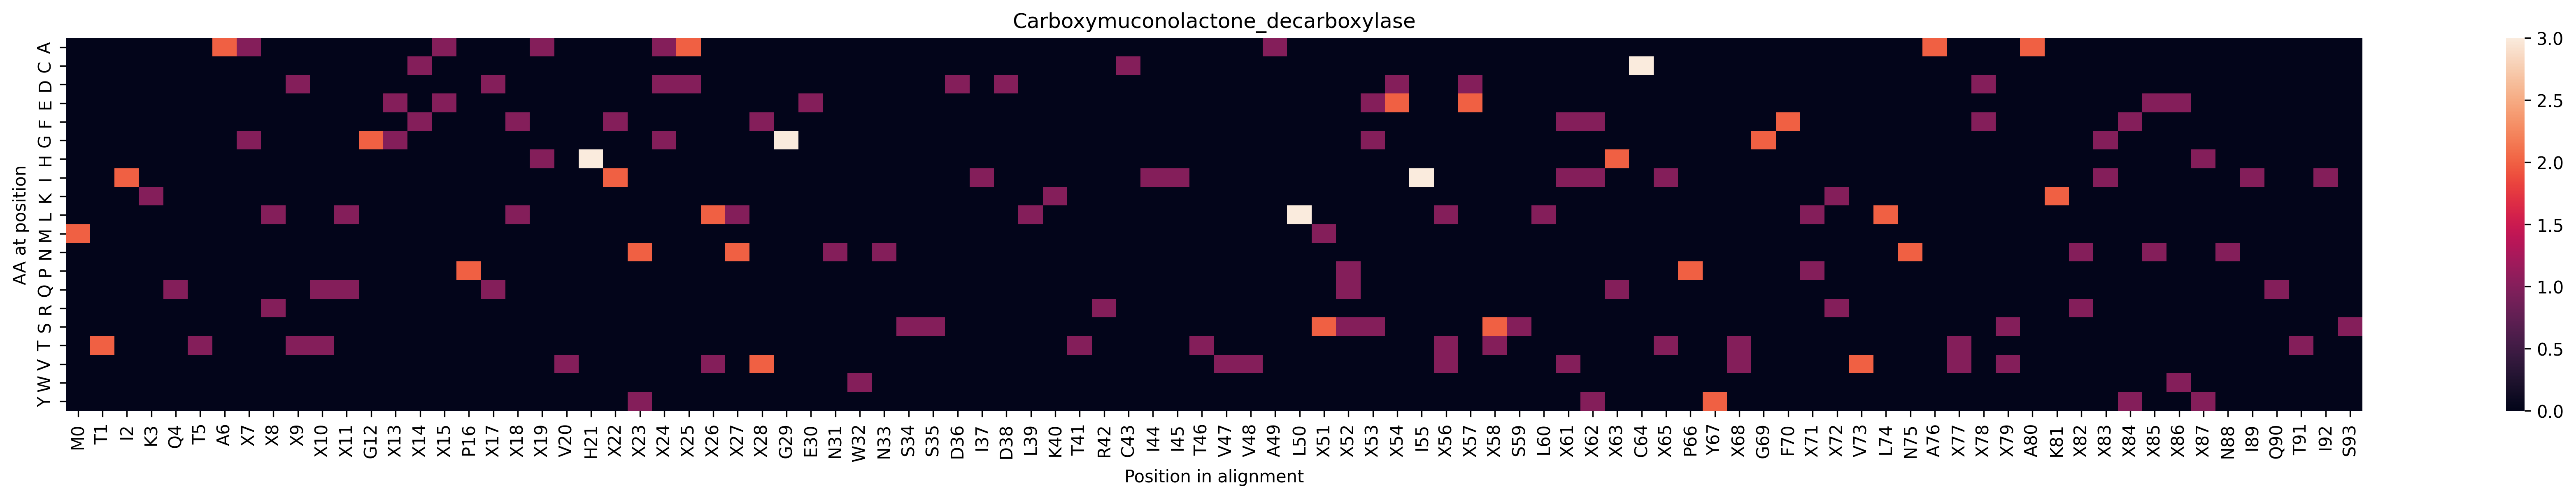

Total rec count:  20
Found 21193 entries associated with Late_competence_protein_ComGG_ AND Streptococcus[Organism] in protein database
0 quer_lim 300 300


In [ ]:
qrseq = PullQCGenes(email='alarsen525@gmail.com', ncbi_api_key='5ad23cdce078ec9c214e1cc886fd2f8a7409')
tax_space = 'Streptococcaceae'
tax_space = 'Streptococcus'

# tax_space is the phylogenetic space to restrict the search to
# top: int top n genes in rna_df, limit: int number of sequeneces to query
df = qrseq.pull_and_qc_genes(rna_df, tax_space, limit=300)

In [ ]:
rna_df.to_csv('control_seqs_strep.csv')